In [2]:
import pymc3 as pm
import theano.tensor as T
from testhelper.posterior_plotters import plot_var
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [41]:
with pm.Model():
    uniform = pm.Uniform('Uniform', lower=30, upper=300)
    uniform_det = pm.Deterministic('Uniform_det', uniform)
    normal_observed = pm.Normal('Normal_obs', mu=31, sd=2, observed=uniform)
    map_estimate = pm.find_MAP()
    trace = pm.sample(10000, init='advi')

logp = -7.5574, ||grad|| = 1.0992: 100%|██████████| 20/20 [00:00<00:00, 2441.17it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 46.155:   5%|▍         | 9874/200000 [00:03<01:11, 2667.34it/s] 
Convergence achieved at 9900
Interrupted at 9,899 [4%]: Average Loss = 704.16
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Uniform]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:06<00:00, 3134.84draws/s]
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f33fb2390>,
      dtype=object)

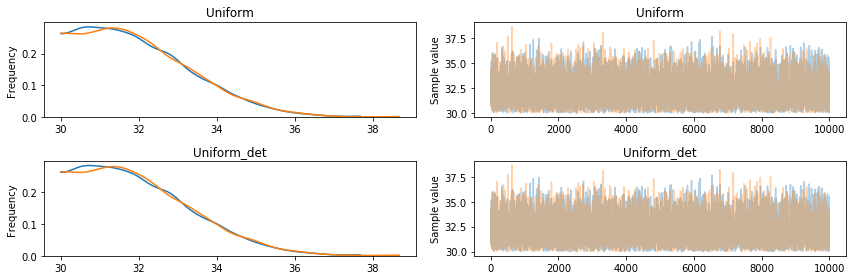

In [42]:
pm.traceplot(trace)

In [43]:
print(map_estimate)

{'Uniform_interval__': array(-5.5947087), 'Uniform': array(31.00000267), 'Uniform_det': array(31.00000267)}
